# 지도학습

feature: 설명변수, 독립변수, 예측변수
target: 목적변수, 반응변수, 종속변수

- label(target data)가 이 있는 데이터를 학습한다.
- 인식, 분류, 진단, 예측 등의 문제해결에 적합

## 종류

1. 로지스틱 회귀
    
    target이 범주형인 경우 적용되는 회귀 분석 모형, 분류로 많이 사용됨
    

2. 인공신경망 분석(ANN)
    
    인간의 뉴런 구조를 모방하여 만든 기계학습 모델
    

3. 의사결정나무
    
    속성(feature)들로 분할 기준 속성을 판별하고, 기준 속성에 따라 트리 형태로 모델링 하여 분류 및 예측 모델
    

4. 서포트 벡터 머신

    데이터를 분리하는 초평면 중에 데이터들과 가장 먼 초평면을 선택하여 분리하는 이진 선형 분류 모델
    

5. KNN(K-최근접 이웃 기법)
    
    인접한 k개의 값에 영향을 받아 분류하는 모델
    

6. 앙상블 기법

    랜덤포레스트, 배깅, 부스팅 등 다양한 모델을 앙상블 하여 모델링
    
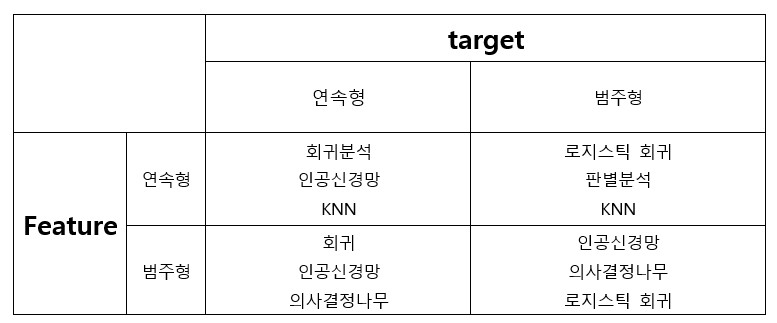

## 1. 로지스틱 회귀

 - 하나 이상의 feature들이 target에 미치는 영향을 추정할 수 있는 통계기법
 
 - 변수들 사이의 인과관계를 밝히고 target을 예측, 추론
 
 - 선형성, 독립성, 등분산성, 비상관성, 정상성을 만족시켜야함
 
    ### 주요 파라메터 (C)

   - C 값 (기본값 = 1)

   - C 값이 작으면 Penalty 강해짐 (단순 모델)

   - C 값이 크면 Penalty 약해짐 (정규화 없어짐)

   - 보통 로그스케일로 지정(10배씩) = 0.01, 0.1, 1, 10


In [127]:
# iris data로 예시 설명

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt

iris=load_iris()
iris_feature=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_target=pd.DataFrame(data=iris.target,columns=['species'])

iris_data=pd.concat([iris_feature,iris_target],axis=1)

# 훈련, 테스트 셋으로 분할
trainX, validX, trainY, validY=train_test_split(iris_feature,iris_target,test_size=0.2)


# grid search를 통한 최적의 parameter 설정

lr_param={'C':[0.001,0.01,0.1,10,100], 'penalty':['l1','l2']}
lr=LogisticRegression()

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

def grid_search(e,p_g,kf,feature,target):
    grid=GridSearchCV(estimator=e,   # 모델
                param_grid=p_g,     # grid search할 파라미터 
                cv=kf,             # kfold를 하며 수행
                n_jobs=-1,       # 사용가능한 모든 메모리 사용
                verbose=2)       # 현 상황 표시
    
    grid.fit(feature, target)
    print(grid.best_params_)    # 최적의 파라미터 출력
    




# kfold 검증

def cross_validation(how,feature,target):   # feature,target은 DataFrame형태여야함 
    
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    acc_outcomes=[]
    logloss_outcomes=[]
    
    for n_fold,(train_index,valid_index) in enumerate(folds.split(feature,target)):
        trainX, validX=feature.iloc[train_index], feature.iloc[valid_index]
        trainY, validY=target.iloc[train_index], target.iloc[valid_index]
        how.fit(trainX,trainY)
        
        # logloss
        pred_prob=how.predict_proba(validX)
        
        logloss=log_loss(validY,pred_prob)
        logloss_outcomes.append(logloss)
        
        # accuracy 
        pred_acc=how.predict(validX)
        
        acc=accuracy_score(validY,pred_acc)
        acc_outcomes.append(acc)
        
        print(f"Fold {n_fold}  accuracy:{acc}  logloss:{logloss}")

    print('mean Accuracy: {}   mean logloss: {}'.format(np.mean(acc_outcomes),np.mean(logloss_outcomes)))

    
    
# 혼동 행렬

def c_matrix(how,test_feature,test_target):
    disp=plot_confusion_matrix(how,test_feature,test_target,
                               display_labels=test_target[test_target.columns[0]].unique(),
                               cmap=plt.cm.Blues,
                               normalize='true'    # normalize로 pred, 갯수, 나타낼 수 있음
                              )
    disp.ax_.set_title('confusion matrix')
    
    print('confusion matrix')
    
    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)
    print(disp.confusion_matrix)
    
    plt.show()


In [89]:
grid_search(lr,lr_param,kf,iris_feature, iris_target)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.7s finished
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'C': 100, 'penalty': 'l2'}


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [105]:
m=LogisticRegression(C=100,penalty='l2')

cross_validation(m,iris_feature,iris_target)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C

Fold 0  accuracy:1.0  logloss:0.006850436005087363
Fold 1  accuracy:0.9666666666666667  logloss:0.1662876250505073
Fold 2  accuracy:1.0  logloss:0.0171529929298085
Fold 3  accuracy:0.9  logloss:0.12898754284750283
Fold 4  accuracy:0.9666666666666667  logloss:0.08616391160589118
mean Accuracy: 0.9666666666666666   mean logloss: 0.08108850168775943


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.08333333 0.91666667]]


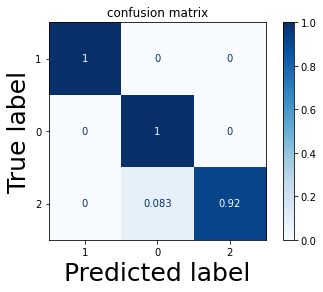

In [128]:
c_matrix(m.fit(trainX,trainY),validX,validY)

## 2. SVM(서포트 벡터 머신)

 - 데이터를 분리하는 margin(결정경계면)이 큰 최적의 결정 경계를 찾는 알고리즘
 
 - rbf 커널기법을 사용하면 비선형 분류가 가능하다.
 
 - hard margin이면 과대적합되기 쉽고, soft margin 일수록 과소적합 되기 쉽다.
 
   ### 1) 주요 파라미터 (C)
   
   - C는 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는 가를 나타낸다.
   
   - C값이 크면 이상치의 존재 가능성을 낮게 보며 hard margin, C값이 작으면 soft margin이다.
   
   ### 2) 주요 파라미터 (gamma)
   
   - gamma는 하나의 데이터 샘플이 영향력을 행사하는 거리(결정 경계의 곡률)을 결정한다.
   
   - gamma값이 클수록 데이터 포인터가 영향력을 행사하는 거리가 짧아진다.(구불 구불 해짐)
   
   - gamma값이 크면 과대적합 되기 쉽고, 작으면 과소적합 될 가능성이 크다. 
   
   
### kernel 종류

 - linear
 
 - poly
 
 - rbf
 
 - sigmoid
 
 - precomputed
   

In [195]:
from sklearn.svm import SVC

svm_param={'C':[0.01,0.1,1,10,100], 'gamma':[0.01,0.1,1,10,100]}
svm=SVC()

grid_search(svm,svm_param,kf,iris_feature, iris_target)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s


{'C': 1, 'gamma': 0.1}


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    3.1s finished
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [194]:
m1=SVC(C=1, gamma=0.1,probability=True)

cross_validation(m1,iris_feature,iris_target)

Fold 0  accuracy:1.0  logloss:0.05562302934737891
Fold 1  accuracy:0.9333333333333333  logloss:0.14009925993501846
Fold 2  accuracy:1.0  logloss:0.06838736683597384
Fold 3  accuracy:0.9333333333333333  logloss:0.13937882510166813
Fold 4  accuracy:1.0  logloss:0.08264347411945702
mean Accuracy: 0.9733333333333334   mean logloss: 0.09722639106789928


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\u

confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


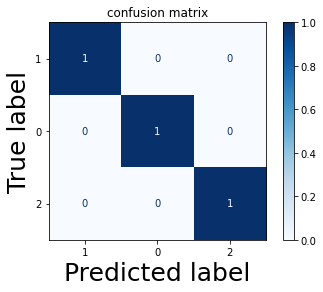

In [196]:
c_matrix(m1.fit(trainX,trainY),validX,validY)

## 3. KNN(K-최근접 이웃)

- 한 데이터에 가까이 있는 K개의 데이터를 분석하여 분류한다.
    
    ### 주요 파라미터 (K)
    
    - 데이터에 가까이 있는 K개의 데이터를 추려내어 판단
    
    - K가 작으면 과대적합, K가 크면 과서적합(일반화)

In [200]:
from sklearn.neighbors import KNeighborsClassifier

knn_params={'n_neighbors':[3,5,10,15,20,25]}
knn=KNeighborsClassifier()

grid_search(knn,knn_params,kf,iris_feature, iris_target)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'n_neighbors': 10}


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [201]:
m2=KNeighborsClassifier(n_neighbors=10)

cross_validation(m2,iris_feature,iris_target)

Fold 0  accuracy:1.0  logloss:0.034728465161652
Fold 1  accuracy:0.9333333333333333  logloss:0.10782842597971326
Fold 2  accuracy:1.0  logloss:0.048665672683709346
Fold 3  accuracy:0.9333333333333333  logloss:0.13406126238118027
Fold 4  accuracy:1.0  logloss:0.08283157550042798
mean Accuracy: 0.9733333333333334   mean logloss: 0.08162308034133657


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


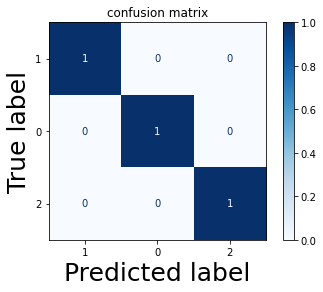

In [202]:
c_matrix(m2.fit(trainX,trainY),validX,validY)

## 4. DecisionTree(결정 나무)

 - 특정 기준(질문)에 따라 데이터를 구분하는 모델로 한번의 분기 때마다 변수 영역을 두개로 구분한다.
 
 -  트리에 가지를 많이 칠수록 과대적합될 가능성이 크다.
 
 ### 1) 주요 파라미터 (max_depth)
 
     - 최대 깊이로 깊이가 max_depth보다 크게 가지를 치지 않는다. 
     
     - 가지를 너무 많이 치면 과대적합이 될 가능성이 높지만 너무 적게 치면 과소적합이 된다.
     
 ### 2) 주요 파라미터 (min_samples_split)
 
  - 한 노드에 들어있는 최소 데이터 수를 정한다.
  
  -  min_sample_split 개의 데이터가 있으면 그 노드는 더이상 분기를 하지 않는다.
  

In [210]:
from sklearn.tree import DecisionTreeClassifier

dt_params={'max_depth':[None,1,2,3,4],'min_samples_split':[None,1,2,3,4]}
dt=DecisionTreeClassifier()

grid_search(dt,dt_params,kf,iris_feature, iris_target)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s


{'max_depth': 3, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    3.5s finished


In [211]:
m3=DecisionTreeClassifier(max_depth=3,min_samples_split=2)

cross_validation(m3,iris_feature,iris_target)

Fold 0  accuracy:1.0  logloss:0.00888941569405555
Fold 1  accuracy:0.8666666666666667  logloss:2.375825912238588
Fold 2  accuracy:0.9666666666666667  logloss:0.13077721700541015
Fold 3  accuracy:0.9333333333333333  logloss:2.312174495409107
Fold 4  accuracy:0.9666666666666667  logloss:0.11735096972970091
mean Accuracy: 0.9466666666666667   mean logloss: 0.9890036020153723


confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.08333333 0.91666667]]


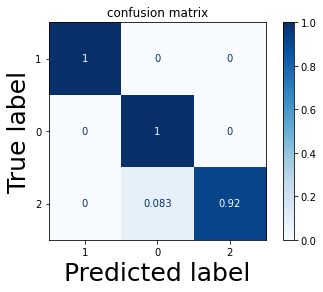

In [212]:
c_matrix(m3.fit(trainX,trainY),validX,validY)

## 5.앙상블 기법
 
 - 여러개의 분류기를 생성하고, 그 예측을 결합하여 정확한 예측을 도출한다. 

    ### 1) Voting
    
    - 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
    
    - 서로 다른 알고리즘을 여러개 결합하여 사용
    
    - hard voting: 다수의 분류기가 예측한 결과값을 최종으로 선정
    
    - soft voting: 모든 분류기가 예측한 레이블의 확률 평균을 구한 뒤 가장 확률이 높은 레이블을 최종 선정
    
   ### 2) Bagging
    
    - 데이터 샘플링(Bootstrap)을 통해 모델을 학습시키고 결과를 집계하는 방법
    
    - 데이터 분할 시 중복을 허용
    
    - 과적합 방지에 효과적
    
    - random forest
    
   ### 3) Boosting
    
    - 여러개의 분류기가 순차적으로 학습 수행
    
    - 틀린 데이터에 대해 가중치를 부여하며 학습과 예측을 진행
    
    - 예측 성능이 뛰어남
    
    - 성능은 좋지만, 속도가 느리고 과적합 발생 가능성 존재
    
    - XGBoost, LightGBM, CatBoost